In [1]:
import pandas as pd
import plotly.graph_objects as go
import json

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.patches import Rectangle
import numpy as np
plt.rcParams.update({'font.size': 18})

In [3]:
#df = pd.read_excel('Extracted_data.xlsx', sheet_name ='Sheet1' )
df = pd.read_excel('..\Data\Extracted_data.xlsx', sheet_name ='Sheet1' )
df

,States,State Abbreviation,Y2006,Y2010,Y2014,Y2018
0,Uttarakhand,UK,178.0,227.0,340,442
1,Uttar Pradesh,UP,109.0,118.0,117,173
2,Bihar,BR,10.0,8.0,28,31
3,Andhra Pradesh (Including Telangana),APTS,95.0,72.0,68,74
4,Chattisgarh,CG,26.0,26.0,46,19
5,Madhya Pradesh,MP,300.0,257.0,308,526
6,Maharashtra,MH,103.0,169.0,190,312
7,Odisha,OD,45.0,32.0,28,28
8,Rajasthan,RJ,32.0,36.0,45,36
9,Jharkhand,JH,NaN,10.0,3,5


In [4]:
xval = df["State Abbreviation"]

y2006 = df["Y2006"]
y2006 = y2006.fillna(0)   # Replacing NaN with 0
y2006 = y2006.astype(int) # Converting all tiger count values to intergers

y2010 = df["Y2010"]
y2010 = y2010.fillna(0)
y2010 = y2010.astype(int)

y2014 = df["Y2014"]
y2014 = y2014.fillna(0)
y2014 = y2014.astype(int)

y2018 = df["Y2018"]
y2018 = y2018.fillna(0) 
y2018 = y2018.astype(int)

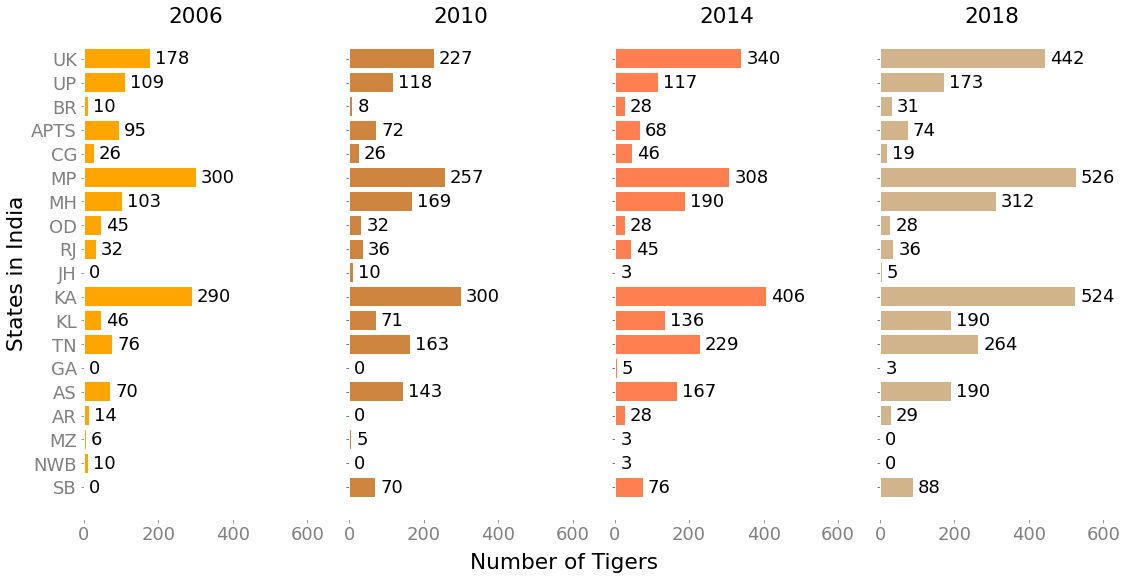

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=4,  sharex='col', sharey='row', figsize=(16, 8)) #,sharey=True

bg_col = 'white'

axs[0].barh(list(reversed(xval)), list(reversed(y2006)), align='center', color = 'orange', label = '2006');
axs[0].set(xlabel='2006', ylabel='States in India'); #title='2006'
axs[0].yaxis.label.set_color('black')
axs[0].tick_params(axis='y', colors='gray')

axs[1].barh(list(reversed(xval)), list(reversed(y2010)), align='center', color = 'peru', label = '2010');
axs[1].set(xlabel='2010', ylabel=''); #title='2010'

axs[2].barh(list(reversed(xval)), list(reversed(y2014)), align='center', color = 'coral', label = '2014');
axs[2].set(xlabel='2014', ylabel=''); #title='2014'

axs[3].barh(list(reversed(xval)), list(reversed(y2018)), align='center', color = 'tan', label = '2018');
axs[3].set(xlabel='2018', ylabel=''); #title='2018'

# bbox = axs[0].get_position();
# rect = Rectangle((0,bbox.y0),1,bbox.height, color=bg_col, zorder=-1, transform=fig.transFigure, clip_on=False);
# axs[0].add_artist(rect);

fig.text(0.5, 0.001, 'Number of Tigers', va='center', ha='center', fontsize=plt.rcParams['axes.labelsize'])

for ag in axs:
    ag.xaxis.set_label_position('top')
    ag.patch.set_facecolor(bg_col)
    ag.xaxis.label.set_color('black')
    ag.tick_params(axis='x', colors='gray')
    ag.set_xlim(0, 600)
    
    # ag.set_axisbelow(True)
    # ag.legend()
    # ag.grid(linestyle='-', linewidth='0.5', color='black')
    
    for pt in ag.patches:
        ag.annotate("%d" % pt.get_width(), (pt.get_x() + pt.get_width(), pt.get_y()), xytext=(5, 4.4), textcoords='offset points', color='black') #fontsize=15,

fig.tight_layout();

In [2]:
# Ref: https://pbpython.com/effective-matplotlib.html
# Ref for colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [102]:
fig.savefig('../Main Webpage/HTMLs/viz6.png', transparent=False, bbox_inches="tight")